<a href="https://colab.research.google.com/github/otlish/Lab1_DWDM/blob/main/Lab1_DWDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Step 1: Install required packages (only needed once in Colab)
import requests
import csv
import time
import pandas as pd

# Step 2: Function to fetch and save stock data
def fetch_and_save_stock_data(symbol, from_date, to_date, items_per_page=100):
    symbol = symbol.upper()
    url = "https://www.nepalipaisa.com/api/GetStockHistory"
    page_no = 1
    all_data = []

    while True:
        params = {
            "stockSymbol": symbol,
            "fromDate": from_date,
            "toDate": to_date,
            "pageNo": page_no,
            "itemsPerPage": items_per_page,
            "pagePerDisplay": 20
        }

        response = requests.get(url, params=params)
        print(f"Fetching {symbol}, page {page_no} | Status: {response.status_code}")
        if response.status_code != 200:
            print(f"Failed to fetch data for {symbol}: HTTP {response.status_code}")
            break

        data = response.json()
        stock_data = data.get('result', {}).get('data', [])

        if not stock_data:
            print(f"No more data found for {symbol} at page {page_no}.")
            break

        all_data.extend(stock_data)
        page_no += 1
        time.sleep(0.5)

    if all_data:
        df = pd.DataFrame(all_data)
        save_path = f'{symbol}.csv'
        df.to_csv(save_path, index=False)
        print(f"Data for {symbol} saved to: {save_path}")
    else:
        print(f"No data found for {symbol}")

# Step 3: Take input from the user
user_symbol = input("Enter stock symbol: ").strip().upper()
from_date = "2020-01-01"
to_date = "2025-05-19"

# Step 4: Fetch and save
fetch_and_save_stock_data(user_symbol, from_date, to_date)


Enter stock symbol: PRVU
Fetching PRVU, page 1 | Status: 200
Fetching PRVU, page 2 | Status: 200
Fetching PRVU, page 3 | Status: 200
Fetching PRVU, page 4 | Status: 200
Fetching PRVU, page 5 | Status: 200
Fetching PRVU, page 6 | Status: 200
Fetching PRVU, page 7 | Status: 200
Fetching PRVU, page 8 | Status: 200
Fetching PRVU, page 9 | Status: 200
Fetching PRVU, page 10 | Status: 200
Fetching PRVU, page 11 | Status: 200
Fetching PRVU, page 12 | Status: 200
Fetching PRVU, page 13 | Status: 200
Fetching PRVU, page 14 | Status: 200
No more data found for PRVU at page 14.
Data for PRVU saved to: PRVU.csv


In [6]:
import pandas as pd

file_path = "PRVU.csv"

try:
    df = pd.read_csv(file_path)
    print(df.head())  # Display the first few rows
except FileNotFoundError:
    print(f"File '{file_path}' not found in the current directory.")


   sn            tradeDate tradeDateString  maxPrice  minPrice  closingPrice  \
0   1  2025-05-19T00:00:00      2025-05-19     201.2     197.0        199.61   
1   2  2025-05-18T00:00:00      2025-05-18     199.7     197.0        197.44   
2   3  2025-05-15T00:00:00      2025-05-15     202.2     197.5        197.92   
3   4  2025-05-14T00:00:00      2025-05-14     201.0     198.0        198.24   
4   5  2025-05-13T00:00:00      2025-05-13     205.0     198.5        199.12   

   noOfTransactions  volume      amount  previousClosing  differenceRs  \
0               281   64313  12831099.1           197.44          2.17   
1               362   75409  14917565.0           197.92         -0.48   
2               398   88758  17595716.7           198.24         -0.32   
3               326   75759  15044452.3           199.12         -0.88   
4               417  109223  21886421.7           201.21         -2.09   

   percentChange  
0           1.10  
1          -0.24  
2          -0.16 

In [7]:
df.info()        # Check data types
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sn                1203 non-null   int64  
 1   tradeDate         1203 non-null   object 
 2   tradeDateString   1203 non-null   object 
 3   maxPrice          1203 non-null   float64
 4   minPrice          1203 non-null   float64
 5   closingPrice      1203 non-null   float64
 6   noOfTransactions  1203 non-null   int64  
 7   volume            1203 non-null   int64  
 8   amount            1203 non-null   float64
 9   previousClosing   1203 non-null   float64
 10  differenceRs      1203 non-null   float64
 11  percentChange     1203 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 112.9+ KB


,0
sn,0
tradeDate,0
tradeDateString,0
maxPrice,0
minPrice,0
closingPrice,0
noOfTransactions,0
volume,0
amount,0
previousClosing,0


In [8]:
df.duplicated().sum()


np.int64(0)

<Axes: title={'center': 'Weekly Close Price'}, xlabel='tradeDate'>

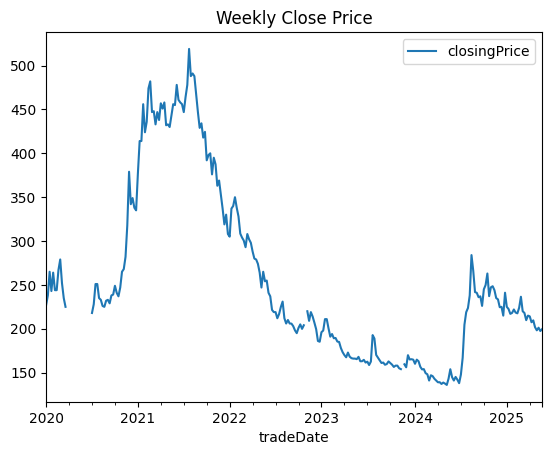

In [9]:
df['tradeDate'] = pd.to_datetime(df['tradeDate'])  # Convert it to datetime
df.set_index('tradeDate', inplace=True)            # Use it as index
weekly_df = df.resample('W').agg({'closingPrice': 'last'})
weekly_df.plot(title='Weekly Close Price')


<Axes: title={'center': 'Monthly Close Price'}, xlabel='tradeDate'>

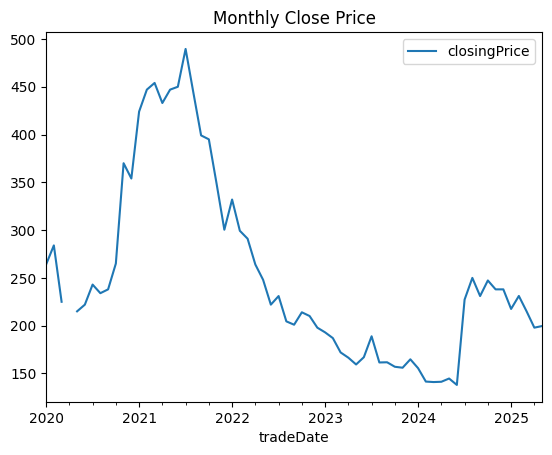

In [10]:
monthly_df = df.resample('ME').agg({'closingPrice': 'last'})
monthly_df.plot(title='Monthly Close Price')


<Axes: title={'center': '14-Day Moving Average'}, xlabel='tradeDate'>

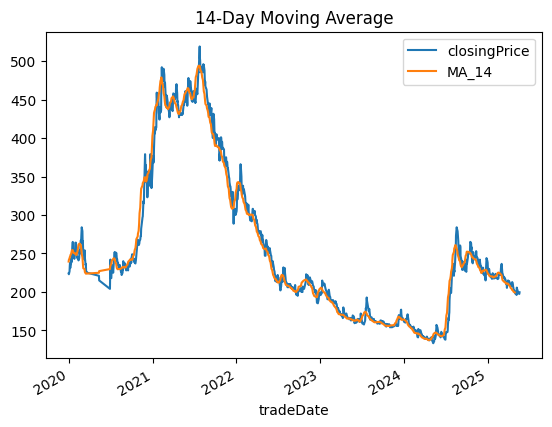

In [11]:
df['MA_14'] = df['closingPrice'].rolling(window=14).mean()
df[['closingPrice', 'MA_14']].plot(title='14-Day Moving Average')

<Axes: title={'center': '14-Day Weighted Moving Average'}, xlabel='tradeDate'>

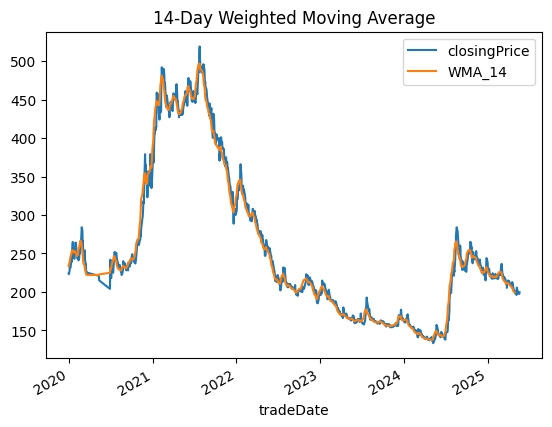

In [12]:
weights = range(1, 15)
def weighted_moving_avg(prices):
    return (prices * weights).sum() / sum(weights)


df['WMA_14'] = df['closingPrice'].rolling(window=14).apply(weighted_moving_avg, raw=True)

df[['closingPrice', 'WMA_14']].plot(title='14-Day Weighted Moving Average')

<Axes: title={'center': 'RSI (14)'}, xlabel='tradeDate'>

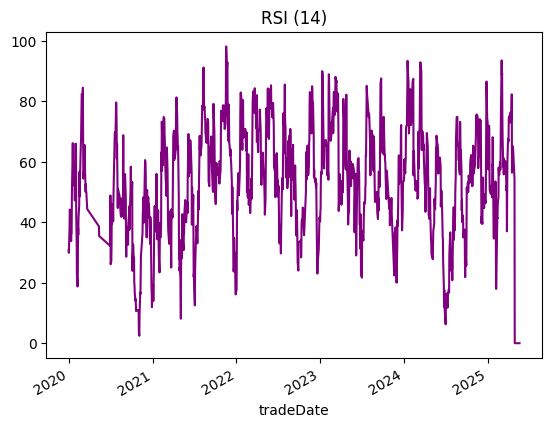

In [13]:
delta = df['closingPrice'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss

rs = rs.replace([float('inf'), -float('inf')], 100)
rs = rs.fillna(0) # Handle cases where both avg_gain and avg_loss are 0
df['RSI'] = 100 - (100 / (1 + rs))
df['RSI'].plot(title='RSI (14)', color='purple')

<ipython-input-14-c740817d50c2>:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['OBV'].iloc[0] = df['Volume'].iloc[0]
<ipython-input-14-c740817d50c2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

<Axes: title={'center': 'On-Balance Volume'}, xlabel='tradeDate'>

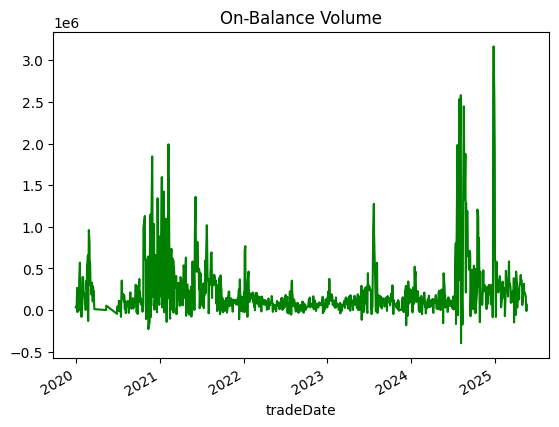

In [14]:
df['Volume'] = df['volume']
df['OBV'] = 0


price_change = df['closingPrice'].diff()


obv_volume = df['Volume'].where(price_change > 0, -df['Volume'].where(price_change < 0, 0))


if len(df) > 0:
    df['OBV'].iloc[0] = df['Volume'].iloc[0]

    df['OBV'] = obv_volume.cumsum() + df['Volume'].iloc[0] - obv_volume.iloc[0]

if len(df) > 0:
    df['OBV_calc'] = df['Volume']

    df.loc[price_change > 0, 'OBV_calc'] = df['Volume'][price_change > 0] + df['OBV_calc'].shift(1)[price_change > 0]
    df.loc[price_change < 0, 'OBV_calc'] = -df['Volume'][price_change < 0] + df['OBV_calc'].shift(1)[price_change < 0]
    df.loc[price_change == 0, 'OBV_calc'] = df['OBV_calc'].shift(1)[price_change == 0]

    # Handle the very first OBV value explicitly if it wasn't set correctly by the above
    df['OBV_calc'].iloc[0] = df['Volume'].iloc[0]

    # Now set the actual OBV column
    df['OBV'] = df['OBV_calc']
    df = df.drop(columns=['OBV_calc']) # Clean up the temporary column


df['OBV'].plot(title='On-Balance Volume', color='green')

<Axes: title={'center': 'CCI (20)'}, xlabel='tradeDate'>

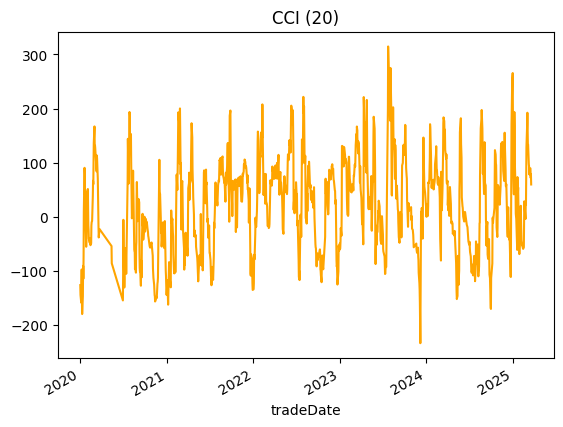

In [15]:
tp = (df['maxPrice'] + df['minPrice'] + df['closingPrice']) / 3
tp_ma = tp.rolling(20).mean()
tp_md = (tp - tp_ma).abs().rolling(20).mean()
df['CCI'] = (tp - tp_ma) / (0.015 * tp_md)
df['CCI'].plot(title='CCI (20)', color='orange')